In [10]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
import scib_metrics
from lightning.pytorch.callbacks import ModelCheckpoint
import copy
%matplotlib inline
import sys
sys.path.append('..')
from functions import *
from SCVIModelCheckpoint import SCVIModelCheckpoint 

In [11]:
adata = anndata.read_h5ad(filename="../data/adataImmHum4.h5ad")
adata

AnnData object with n_obs × n_vars = 33506 × 4000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [12]:
def trainN(adata, prior, checkpoint, checkpointFolder, N, save = None):
    for i in range(N):
        adata, vae = trainModel(adata, prior, checkpoint = checkpoint, checkpointFolder = checkpointFolder + f"{prior}t{i}/", every_n=390, log=False, logname="MetEps400MG")
        if save:
            vae.save(f"models/{prior}_2")

In [13]:
n = 5

In [14]:
trainN(adata, "sdnormal", True, "../../Poster/models/mean_var_2/",n)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [15:25<00:00,  2.33s/it, v_num=1, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [15:25<00:00,  2.31s/it, v_num=1, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [14:10<00:00,  2.09s/it, v_num=1, train_loss_step=1.44e+3, train_loss_epoch=1.47e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:10<00:00,  2.13s/it, v_num=1, train_loss_step=1.44e+3, train_loss_epoch=1.47e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:55<00:00,  2.10s/it, v_num=1, train_loss_step=1.64e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:55<00:00,  2.09s/it, v_num=1, train_loss_step=1.64e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:09<00:00,  1.73s/it, v_num=1, train_loss_step=1.27e+3, train_loss_epoch=1.47e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:09<00:00,  1.97s/it, v_num=1, train_loss_step=1.27e+3, train_loss_epoch=1.47e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [11:47<00:00,  1.67s/it, v_num=1, train_loss_step=1.58e+3, train_loss_epoch=1.47e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [11:47<00:00,  1.77s/it, v_num=1, train_loss_step=1.58e+3, train_loss_epoch=1.47e+3]


In [15]:
trainN(adata, "mixofgaus", True, "../../Poster/models/mean_var_2/",n)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:59<00:00,  2.08s/it, v_num=1, train_loss_step=1.42e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:59<00:00,  2.10s/it, v_num=1, train_loss_step=1.42e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [14:11<00:00,  2.07s/it, v_num=1, train_loss_step=1.68e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:11<00:00,  2.13s/it, v_num=1, train_loss_step=1.68e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [14:05<00:00,  2.14s/it, v_num=1, train_loss_step=1.47e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:05<00:00,  2.11s/it, v_num=1, train_loss_step=1.47e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [15:29<00:00,  2.04s/it, v_num=1, train_loss_step=1.53e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [15:29<00:00,  2.32s/it, v_num=1, train_loss_step=1.53e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [17:43<00:00,  2.64s/it, v_num=1, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [17:43<00:00,  2.66s/it, v_num=1, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3]


In [17]:
trainN(adata, "vamp", True, "../../Poster/models/mean_var_2/",n)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:38<00:00,  2.05s/it, v_num=1, train_loss_step=1.52e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:38<00:00,  2.05s/it, v_num=1, train_loss_step=1.52e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:36<00:00,  2.10s/it, v_num=1, train_loss_step=1.39e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:36<00:00,  2.04s/it, v_num=1, train_loss_step=1.39e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [14:04<00:00,  2.09s/it, v_num=1, train_loss_step=1.33e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:04<00:00,  2.11s/it, v_num=1, train_loss_step=1.33e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:45<00:00,  2.04s/it, v_num=1, train_loss_step=1.61e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:45<00:00,  2.06s/it, v_num=1, train_loss_step=1.61e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:43<00:00,  2.06s/it, v_num=1, train_loss_step=1.44e+3, train_loss_epoch=1.45e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:43<00:00,  2.06s/it, v_num=1, train_loss_step=1.44e+3, train_loss_epoch=1.45e+3]


In [16]:
trainN(adata, "normalflow", True, "../../Poster/models/mean_var_2/",n)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [25:03<00:00,  3.75s/it, v_num=1, train_loss_step=1.44e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [25:03<00:00,  3.76s/it, v_num=1, train_loss_step=1.44e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [24:59<00:00,  3.78s/it, v_num=1, train_loss_step=1.48e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [24:59<00:00,  3.75s/it, v_num=1, train_loss_step=1.48e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [21:14<00:00,  3.16s/it, v_num=1, train_loss_step=1.43e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [21:14<00:00,  3.19s/it, v_num=1, train_loss_step=1.43e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [21:21<00:00,  3.26s/it, v_num=1, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [21:21<00:00,  3.20s/it, v_num=1, train_loss_step=1.5e+3, train_loss_epoch=1.46e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [21:19<00:00,  3.20s/it, v_num=1, train_loss_step=1.57e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [21:19<00:00,  3.20s/it, v_num=1, train_loss_step=1.57e+3, train_loss_epoch=1.46e+3]


In [18]:
def benchmarkN(prior, N, max_epochs = 395, n_eps = 10):
    results = pd.DataFrame()
    for i in range(N):
        bmi = getBenchmarkResultsEpochs(adata,"models/mean_var_2/"+ f"{prior}t{i}/",400,n_eps)
        benchmark_resultsi = bmi.get_results(min_max_scale=False)
        metrics = benchmark_resultsi.keys()
        for k in range(3):
            metrics_results = []
            for j in range(int(max_epochs/n_eps)):
                metrics_results.append(benchmark_resultsi[metrics[k]][f"scVIepoch={n_eps*j+n_eps-1}"])
            results[f"{prior}{metrics[k]}{i}"] = metrics_results
    results.set_index(np.linspace(n_eps-1,max_epochs-1, int(max_epochs/n_eps)))
    return results  

In [37]:
def method(adata, prior):
    keys = []
    for i in range(5):
        vae = scvi.model.SCVI.load(f"models/mean_var_2/{prior}t{i}/epoch=389",adata=adata)
        adata.obsm[f"{prior}_{i}"] = vae.get_latent_representation()
        keys.append(f"{prior}_{i}")
    return adata, keys 

INFO     File models/mean_var_2/sdnormalt0/epoch=389/model.pt already downloaded                                   
INFO     File models/mean_var_2/sdnormalt1/epoch=389/model.pt already downloaded                                   
INFO     File models/mean_var_2/sdnormalt2/epoch=389/model.pt already downloaded                                   
INFO     File models/mean_var_2/sdnormalt3/epoch=389/model.pt already downloaded                                   
INFO     File models/mean_var_2/sdnormalt4/epoch=389/model.pt already downloaded                                   


In [40]:
adataSD, keysSD = method(adata.copy(), "sdnormal")
bmSD = runBenchmark(adataSD, keysSD,label_key="final_annotation",nmi_ari_cluster_labels_leiden=True, kbet_per_label=True)
resultsSD = bmSD.get_results(min_max_scale=False).drop("Metric Type")

Embeddings: 100%|██████████| 5/5 [02:51<00:00, 34.39s/it]


In [41]:
adataMG, keysMG = method(adata.copy(), "mixofgaus")
bmMG = runBenchmark(adataMG, keysMG,label_key="final_annotation",nmi_ari_cluster_labels_leiden=True, kbet_per_label=True)
resultsMG = bmMG.get_results(min_max_scale=False).drop("Metric Type")

INFO     File models/mean_var_2/mixofgaust0/epoch=389/model.pt already downloaded                                  
INFO     File models/mean_var_2/mixofgaust1/epoch=389/model.pt already downloaded                                  
INFO     File models/mean_var_2/mixofgaust2/epoch=389/model.pt already downloaded                                  
INFO     File models/mean_var_2/mixofgaust3/epoch=389/model.pt already downloaded                                  
INFO     File models/mean_var_2/mixofgaust4/epoch=389/model.pt already downloaded                                  


Embeddings: 100%|██████████| 5/5 [02:31<00:00, 30.31s/it]


In [46]:
adataVP, keysVP = method(adata.copy(), "vamp")
bmVP = runBenchmark(adataVP, keysVP,label_key="final_annotation",nmi_ari_cluster_labels_leiden=True, kbet_per_label=True)
resultsVP = bmVP.get_results(min_max_scale=False).drop("Metric Type")

INFO     File models/mean_var_2/vampt0/epoch=389/model.pt already downloaded                                       
INFO     File models/mean_var_2/vampt1/epoch=389/model.pt already downloaded                                       
INFO     File models/mean_var_2/vampt2/epoch=389/model.pt already downloaded                                       
INFO     File models/mean_var_2/vampt3/epoch=389/model.pt already downloaded                                       
INFO     File models/mean_var_2/vampt4/epoch=389/model.pt already downloaded                                       


Embeddings: 100%|██████████| 5/5 [02:42<00:00, 32.59s/it]


In [47]:
adataNF, keysNF = method(adata.copy(), "normalflow")
bmNF = runBenchmark(adataNF, keysNF,label_key="final_annotation",nmi_ari_cluster_labels_leiden=True, kbet_per_label=True)
resultsNF = bmNF.get_results(min_max_scale=False).drop("Metric Type")

INFO     File models/mean_var_2/normalflowt0/epoch=389/model.pt already downloaded                                 
INFO     File models/mean_var_2/normalflowt1/epoch=389/model.pt already downloaded                                 
INFO     File models/mean_var_2/normalflowt2/epoch=389/model.pt already downloaded                                 
INFO     File models/mean_var_2/normalflowt3/epoch=389/model.pt already downloaded                                 
INFO     File models/mean_var_2/normalflowt4/epoch=389/model.pt already downloaded                                 


Embeddings: 100%|██████████| 5/5 [02:32<00:00, 30.49s/it]


In [63]:
def computeMeanStandardDeviation(results, prior, n):
    resultsMSD = pd.DataFrame(np.zeros((1,3)), columns=["NMI Mean", "ARI Mean", "KBET Mean"])
    #resultsMSD["NMI Mean"] = np.zeros(1)
    #resultsMSD["ARI Mean"] = np.zeros(1)
    #resultsMSD["KBET Mean"] = np.zeros(1)
    for i in range(5):
        resultsMSD["NMI Mean"] += results[f"Leiden NMI"][f"{prior}_{i}"]
        resultsMSD["ARI Mean"] += results[f"Leiden ARI"][f"{prior}_{i}"]
        resultsMSD["KBET Mean"] += results[f"KBET"][f"{prior}_{i}"]
    resultsMSD = resultsMSD * 1/n
    #resultsMSD = resultsMSD.drop("Unnamed: 0",axis=1)
    resultsMSD["NMI SD"] = np.zeros(1)
    resultsMSD["ARI SD"] = np.zeros(1)
    resultsMSD["KBET SD"] = np.zeros(1)
    for i in range(5):
        resultsMSD["NMI SD"] += (results[f"Leiden NMI"][f"{prior}_{i}"]-resultsMSD["NMI Mean"])**2
        resultsMSD["ARI SD"] += (results[f"Leiden ARI"][f"{prior}_{i}"]-resultsMSD["ARI Mean"])**2
        resultsMSD["KBET SD"] += (results[f"KBET"][f"{prior}_{i}"]-resultsMSD["KBET Mean"])**2
    resultsMSD[["NMI SD", "ARI SD","KBET SD"]] = (resultsMSD[["NMI SD", "ARI SD","KBET SD"]] * 1/(n-1))**0.5
    #max_epochs = 390; n_eps = 10
    #resultsMSD["index"] = np.linspace(n_eps-1,max_epochs-1, int(max_epochs/n_eps)).astype(np.int16)
    return resultsMSD

In [56]:
resultsSD

,Leiden NMI,Leiden ARI,KBET,Batch correction,Bio conservation,Total
Embedding,,,,,,
sdnormal_0,0.760304,0.612208,0.190848,0.190848,0.686256,0.488093
sdnormal_1,0.769048,0.615313,0.162564,0.162564,0.69218,0.480334
sdnormal_2,0.770555,0.61792,0.193326,0.193326,0.694238,0.493873
sdnormal_3,0.771397,0.636047,0.169965,0.169965,0.703722,0.490219
sdnormal_4,0.769505,0.624467,0.159715,0.159715,0.696986,0.482077


In [64]:
resultsSD_MSD = computeMeanStandardDeviation(resultsSD, "sdnormal", n)
resultsMG_MSD = computeMeanStandardDeviation(resultsMG, "mixofgaus", n)
resultsVP_MSD = computeMeanStandardDeviation(resultsVP, "vamp", n)
resultsNF_MSD = computeMeanStandardDeviation(resultsNF, "normalflow", n)

In [65]:
resultsSD_MSD

,NMI Mean,ARI Mean,KBET Mean,NMI SD,ARI SD,KBET SD
0,0.768162,0.621191,0.175284,0.004487,0.009452,0.015813


In [68]:
def makeDataBarPlot(resultsSD, resultsMG, resultsVP, resultsNF):
    results = [resultsSD, resultsMG, resultsVP, resultsNF]
    priors = ["SD","MG","VP","NF"]
    metrics = ["NMI","ARI","KBET"]
    val = []
    prior = []
    metric = []
    error = []
    for j in range(4):
        for k in range(3):
            val.append(results[j][f"{metrics[k]} Mean"].iloc[0])
            prior.append(priors[j])
            metric.append(metrics[k])
            error.append(results[j][f"{metrics[k]} SD"].iloc[0])
    data = {'Value': val,'Prior': prior,'Metric': metric,'error': error}
    return data

In [70]:
dataBarPlot = makeDataBarPlot(resultsSD_MSD, resultsMG_MSD, resultsVP_MSD, resultsNF_MSD)

In [71]:
dataframe = pd.DataFrame(dataBarPlot)
dfNMI = dataframe.loc[dataframe["Metric"]=="NMI"]
dfARI = dataframe.loc[dataframe["Metric"]=="ARI"]
dfKBET = dataframe.loc[dataframe["Metric"]=="KBET"]

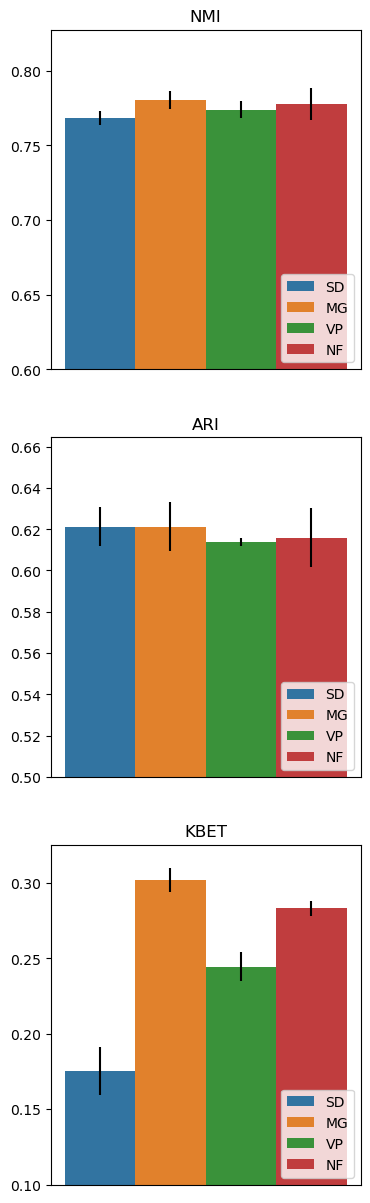

In [73]:
fig, axes = plt.subplots(3,1,figsize=(4,15))
df = [dfNMI, dfARI, dfKBET]
lims = [(0.6,None),(0.5,None),(0.1,None)]
for i in range(3):
    plot = sns.barplot(x='Metric', y='Value', data=df[i], hue='Prior',ax=axes[i])
    plt.xticks(visible=False)
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in plot.patches]
    y_coords = [p.get_height() for p in plot.patches]
    plot.errorbar(x=x_coords, y=y_coords, yerr=df[i]["error"], fmt="none", c="k")
    plot.set_ylim(lims[i])
    plot.set(xlabel=None)
    plot.set(ylabel=None)
    plot.set(title=df[i]['Metric'].iloc[0])
    plot.set(xticks=[])
    plot.legend(loc=4)
    
plt.savefig("plots/barplot2")
plt.show()